In [60]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import numpy as np
from statsmodels.tsa.api import SimpleExpSmoothing, ExponentialSmoothing
from statsmodels.tsa.api import Holt

In [38]:
time = pd.read_csv("C:\Aalesh and Mandar\Datasets\FRED-NROUST.csv")

In [39]:
time.shape

(296, 2)

In [40]:
time.head()

,Date,Value
0,01-01-1949,5.255053
1,01-04-1949,5.261516
2,01-07-1949,5.268013
3,01-10-1949,5.274564
4,01-01-1950,5.281182


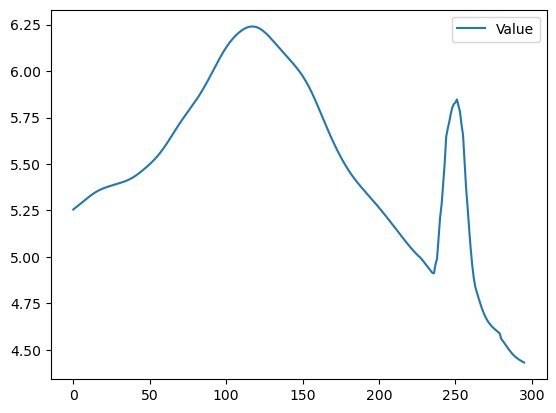

In [41]:
time.plot()
plt.show()

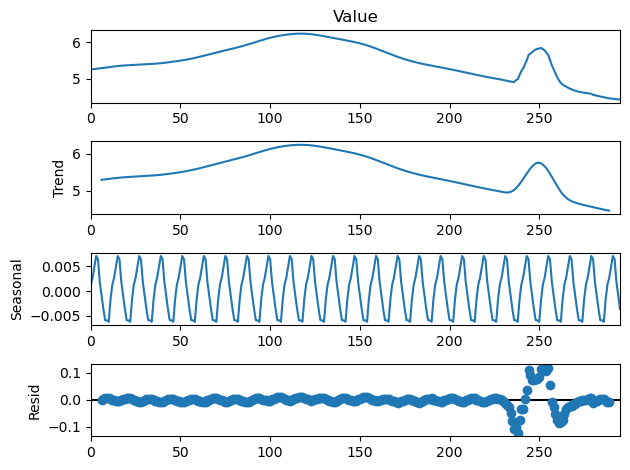

In [42]:
result = seasonal_decompose(time["Value"], model = "additive", period = 12)
result.plot()
plt.show()

In [48]:
y = time["Value"]
y_train = time["Value"][:-8]
y_test = time["Value"][-8:]

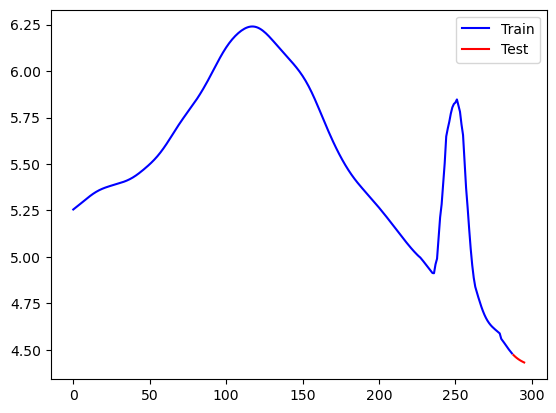

In [49]:
plt.plot(y_train, color="blue", label="Train")
plt.plot(y_test, color="red", label="Test")
plt.legend(loc="best")
plt.show()

## Central Moving Average

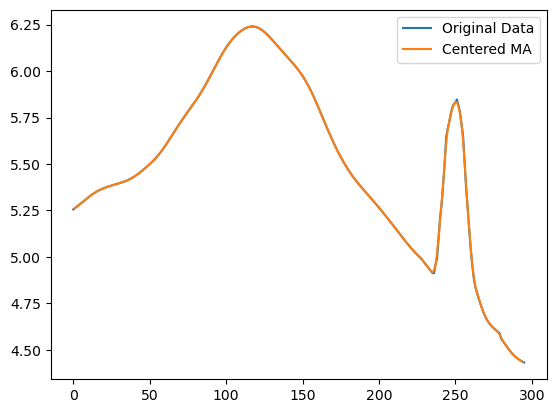

In [50]:
fcast = y.rolling(3, center=True).mean()
plt.plot(y, label = 'Original Data')
plt.plot(fcast, label = 'Centered MA')
plt.legend(loc='best')
plt.show()

## Trailing MA

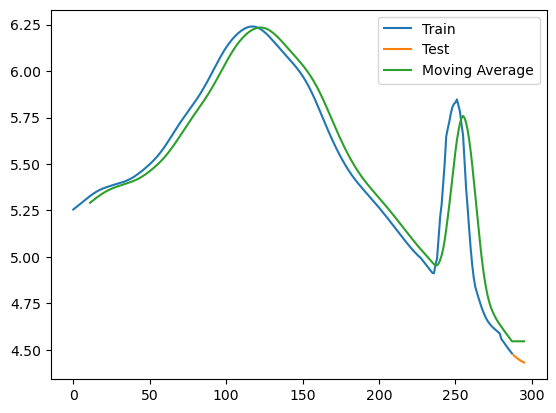

In [51]:
fcast = y_train.rolling(12).mean()
last_val = fcast.iloc[-1]
MA_series = pd.Series(last_val.repeat(len(y_test)))
MA_fcast = pd.concat([fcast, MA_series], ignore_index = True)
plt.plot(y_train, label = 'Train')
plt.plot(y_test, label = 'Test')
plt.plot(MA_fcast, label = 'Moving Average')
plt.legend(loc='best')
plt.show()

In [52]:
rmse = np.sqrt(mean_squared_error(y_test, MA_series))
print("RMSE = ", rmse)

RMSE =  0.09714012555842667


## Simple Exponential Smoothing

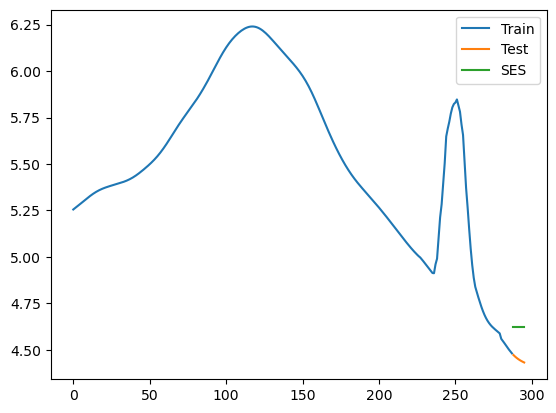

In [53]:
alpha = 0.1
fit1 = SimpleExpSmoothing(y_train).fit(smoothing_level = alpha)
fcast1 = fit1.forecast(len(y_test))
plt.plot(y_train, label = 'Train')
plt.plot(y_test, label = 'Test')
plt.plot(fcast1, label = 'SES')
plt.legend(loc='best')
plt.show()

In [54]:
rmse = np.sqrt(mean_squared_error(y_test, fcast1))
print("RMSE = ", rmse)

RMSE =  0.1712568505665867


## Holt's Linear Trend

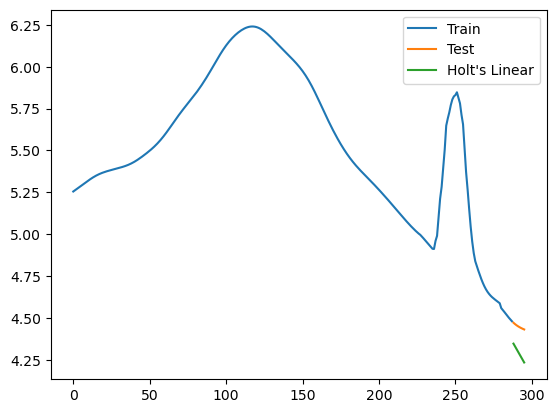

In [55]:
alpha = 0.1
beta = 0.9
fit2 = Holt(y_train).fit(smoothing_level=alpha, smoothing_trend = beta)
fcast2 = fit2.forecast(len(y_test))
plt.plot(y_train, label = 'Train')
plt.plot(y_test, label = 'Test')
plt.plot(fcast2, label = "Holt's Linear")
plt.legend(loc='best')
plt.show()

In [56]:
rmse = np.sqrt(mean_squared_error(y_test, fcast2))
print("RMSE = ", rmse)

RMSE =  0.16040178744308617


## Exponential 

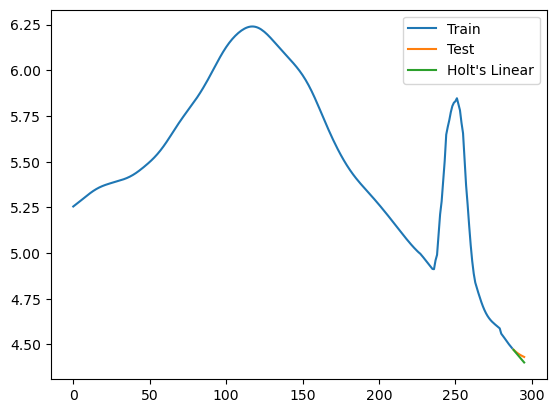

In [57]:
alpha = 0.1
beta = 0.9
fit2 = Holt(y_train, exponential = True).fit()
fcast2 = fit2.forecast(len(y_test))
plt.plot(y_train, label = 'Train')
plt.plot(y_test, label = 'Test')
plt.plot(fcast2, label = "Holt's Exponential")
plt.legend(loc='best')
plt.show()

In [58]:
rmse = np.sqrt(mean_squared_error(y_test, fcast2))
print("RMSE = ", rmse)

RMSE =  0.016618469656492194


## Additive Trend

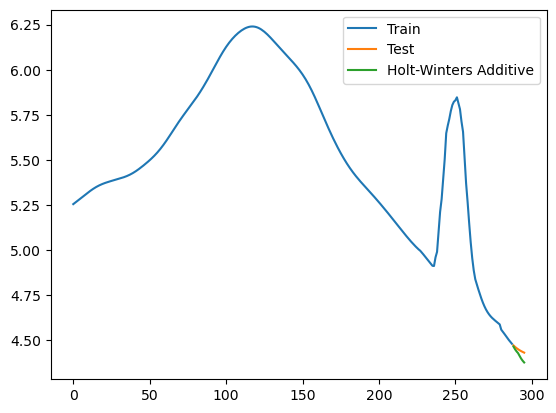

In [65]:
alpha = 0.1
beta = 0.9
phi = 0.2
fit3 = ExponentialSmoothing(y_train, seasonal_periods = 4, trend ="add", seasonal="add").fit()
fcast3 = fit3.forecast(len(y_test))
plt.plot(y_train, label = 'Train')
plt.plot(y_test, label = 'Test')
plt.plot(fcast3, label = "Holt-Winters Additive")
plt.legend(loc='best')
plt.show()

In [62]:
rmse = np.sqrt(mean_squared_error(y_test, fcast3))
print("RMSE = ", rmse)

RMSE =  0.03746186943028238


## Multiplicative Trend

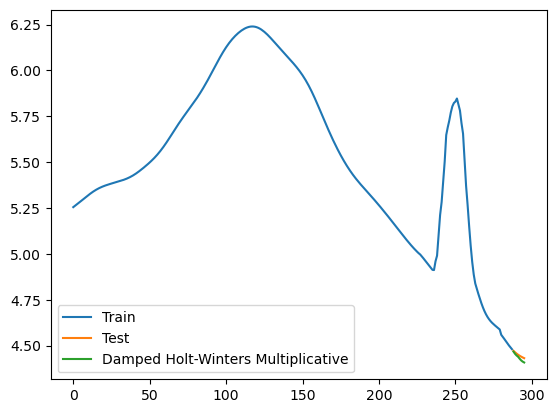

In [66]:
alpha = 0.1
beta = 0.9
phi = 0.2
fit3 = ExponentialSmoothing(y_train, seasonal_periods = 4, damped_trend = True, trend ="add", seasonal="mul").fit()
fcast3 = fit3.forecast(len(y_test))
plt.plot(y_train, label = 'Train')
plt.plot(y_test, label = 'Test')
plt.plot(fcast3, label = "Damped Holt-Winters Multiplicative")
plt.legend(loc='best')
plt.show()

In [67]:
rmse = np.sqrt(mean_squared_error(y_test, fcast3))
print("RMSE = ", rmse)

RMSE =  0.01597463598616033
